In [1]:
import pandas as pd
import numpy as np
import datetime
import os
import os.path
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
dfcovid_ciudades = pd.read_csv(os.path.join('../Output', 'data_final.csv'))
#dfcovid_ciudades.head()

In [3]:
#DataFrame de la ciudad de Medellín

dfmedellin=dfcovid_ciudades[dfcovid_ciudades['CODIGO DIVIPOLA']==5001]
dfmedellin.head()

,ID DE CASO,FECHA DE NOTIFICACION,CODIGO DIVIPOLA,CIUDAD DE UBICACION,DEPARTAMENTO O DISTRITO,ATENCION,EDAD,SEXO,TIPO,ESTADO,PAIS DE PROCEDENCIA,FIS,FECHA DE MUERTE,FECHA DIAGNOSTICO,FECHA RECUPERADO,FECHA REPORTE WEB,TIPO RECUPERACION,CODIGO DEPARTAMENTO,CODIGO PAIS
1,3,2020-03-07,5001,MEDELLIN,ANTIOQUIA,RECUPERADO,50,F,IMPORTADO,LEVE,ESPANA,2020-02-29T00:00:00.000,NaN,2020-03-09,2020-03-15,2020-03-09,PCR,5,724.0
2,4,2020-03-09,5001,MEDELLIN,ANTIOQUIA,RECUPERADO,55,M,RELACIONADO,LEVE,NAN,2020-03-06T00:00:00.000,NaN,2020-03-11,2020-03-26,2020-03-11,PCR,5,NaN
3,5,2020-03-09,5001,MEDELLIN,ANTIOQUIA,RECUPERADO,25,M,RELACIONADO,LEVE,NAN,2020-03-08T00:00:00.000,NaN,2020-03-11,2020-03-23,2020-03-11,PCR,5,NaN
13,20,2020-03-11,5001,MEDELLIN,ANTIOQUIA,RECUPERADO,26,F,RELACIONADO,LEVE,NAN,2020-03-09T00:00:00.000,NaN,2020-03-14,2020-03-24,2020-03-14,PCR,5,NaN
14,21,2020-03-11,5001,MEDELLIN,ANTIOQUIA,RECUPERADO,28,M,RELACIONADO,LEVE,NAN,2020-03-10T00:00:00.000,NaN,2020-03-14,2020-04-10,2020-03-14,PCR,5,NaN


In [4]:
#Casos confirmados para Medellín
dfm = pd.to_datetime(dfmedellin['FECHA REPORTE WEB'])
dfmedellin_nuevoscasos = dfm.groupby(dfm.dt.floor('d')).size().reset_index(name='Nuevos_Casos')
dfm2 = dfmedellin_nuevoscasos['FECHA REPORTE WEB']
dfmedellin_nuevoscasos.index = dfm2

In [5]:
resample = pd.concat([dfmedellin_nuevoscasos], axis=1)
resample['dayofweek'] = resample.index.dayofweek

#Senama
df_lun_dom = resample [resample.dayofweek.isin([0,1,2,3,4,5,6])].Nuevos_Casos


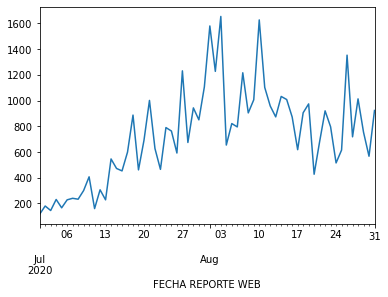

In [7]:
graf_1 = df_lun_dom.loc['2020-07-01':'2020-08-31']
graf_1.plot()

In [8]:
#conjunto de datos
x = df_lun_dom
# hacer la validación cruzada - x_train, x_test, y_test8dias, y_test15dias

In [9]:
# Modelo
modelo_sarima = SARIMAX(x, order=(0,1,1), seasonal_order=(0,1,1,7))

#Ajuste
resultado = modelo_sarima.fit()

resultado.aic

# algoritmo de entrenamiento

/home/oem/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/oem/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


2071.3526549071676

In [10]:
predic_1 = resultado.get_forecast(steps=7*2).predicted_mean #prediga 14 dìas


/home/oem/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [11]:
predic_1

166    760.838376
167    887.421472
168    677.589072
169    878.382461
170    879.077479
171    764.674373
172    903.037292
173    788.901072
174    915.484168
175    705.651768
176    906.445157
177    907.140175
178    792.737069
179    931.099988
dtype: float64

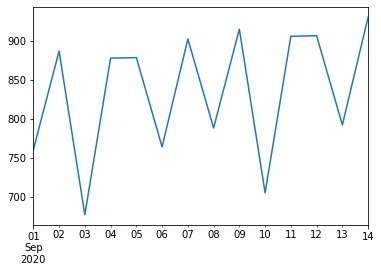

In [12]:
predic_1.index = pd.date_range(start='2020-09-01', end='2020-09-15', freq='d')[:-1]
predic_1.plot()

/home/oem/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/home/oem/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


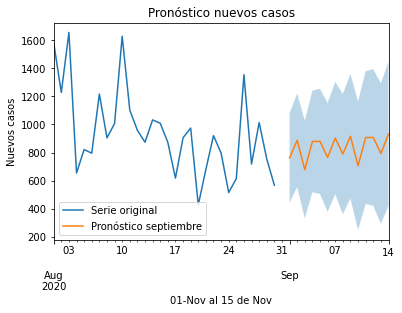

In [13]:
graf_2 = df_lun_dom.loc['2020-08-01':'2020-08-30']
graf_2.plot()

# bandas

band_1_conf = resultado.get_forecast(steps=7*2).conf_int() #por 14 dìas
band_1_conf.index = pd.date_range(start='2020-09-01', end = '2020-09-15', freq='d')[:-1]
x = pd.date_range(start='2020-09-01', end = '2020-09-15', freq='d')[:-1]
y1 = band_1_conf['lower Nuevos_Casos']
y2 = band_1_conf['upper Nuevos_Casos']
plt.fill_between(x, y1, y2, alpha=0.3)

#predicción
predic_1 = resultado.get_forecast(steps=7*2).predicted_mean #prediga 14 dìas
predic_1.index = pd.date_range(start='2020-09-01', end = '2020-09-15', freq='d')[:-1]
predic_1.plot()

#grafica
plt.title('Pronóstico nuevos casos')
plt.ylabel('Nuevos casos')
plt.xlabel('01-Nov al 15 de Nov')
plt.legend(('Serie original', 'Pronóstico septiembre'),
          loc='lower left')
plt.savefig('pronostico.png')
plt.show()